In [1]:
%reset -f
%matplotlib notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

/home/devbuntu/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/devbuntu/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
automobile_df = pd.read_csv('datasets/auto-mpg-processed2.csv')
automobile_df.sample(5)
                            

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,age
6,6,19.0,6,250.0,100,3282,15.0,49
24,24,29.0,4,68.0,49,1867,19.5,47
341,341,11.0,8,318.0,210,4382,13.5,50
232,232,24.0,4,113.0,95,2278,15.5,48
48,48,27.0,4,97.0,88,2100,16.5,48


In [45]:
## seperate training and testing data
from sklearn.model_selection import train_test_split
X = automobile_df[['horsepower']]
Y = automobile_df['mpg']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=.2)

In [46]:
## train the model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True).fit(x_train,y_train)
print('Training Score: ',linear_model.score(x_train, y_train))

Training Score:  0.5841856469337012


In [47]:
## Test the model
## The model is robust because it did far better on the test data than the training data so it is not
## overly fitted to the test data
from sklearn.metrics import r2_score
y_pred = linear_model.predict(x_test)
print('Testing Score: ',r2_score(y_test,y_pred))

Testing Score:  0.68442602811304


<IPython.core.display.Javascript object>


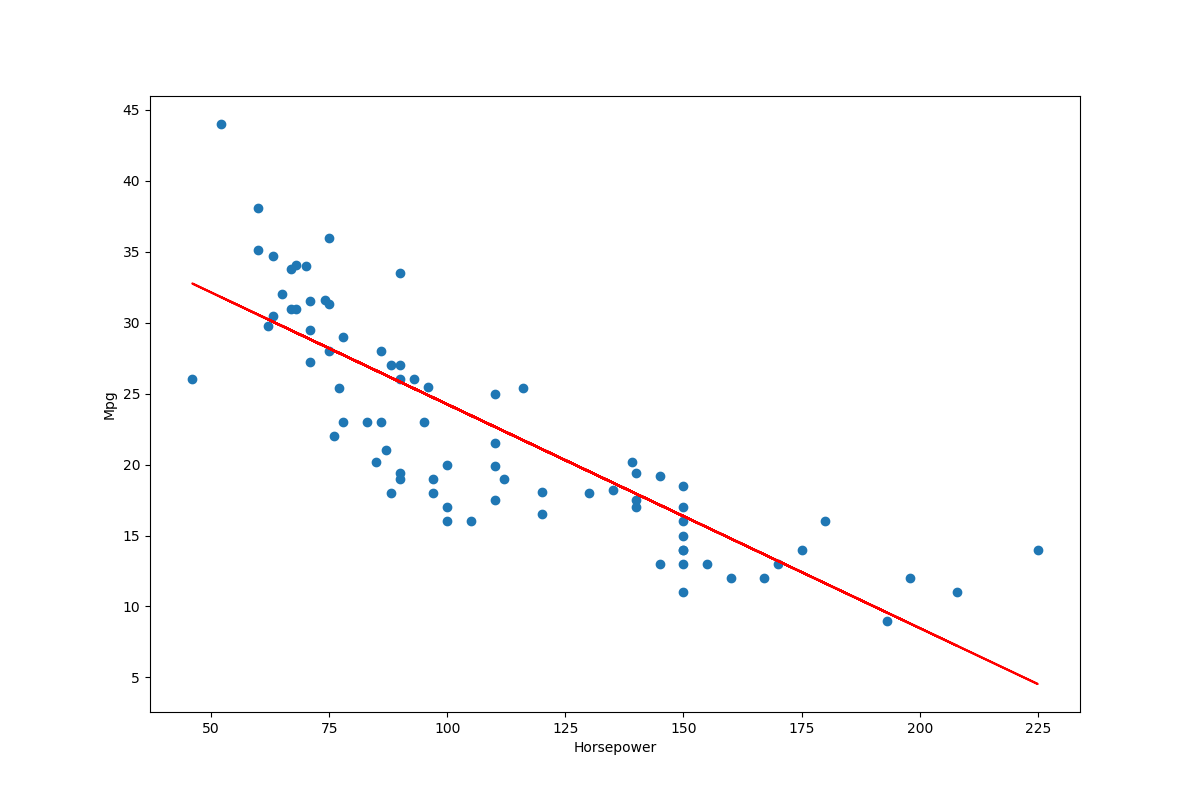

In [48]:
## graph the model to see what's going on
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')
plt.xlabel('Horsepower')
plt.ylabel('Mpg')
plt.show()

Training Score:  0.33737561410253714
Testing Score:  0.32127341885782623


<IPython.core.display.Javascript object>


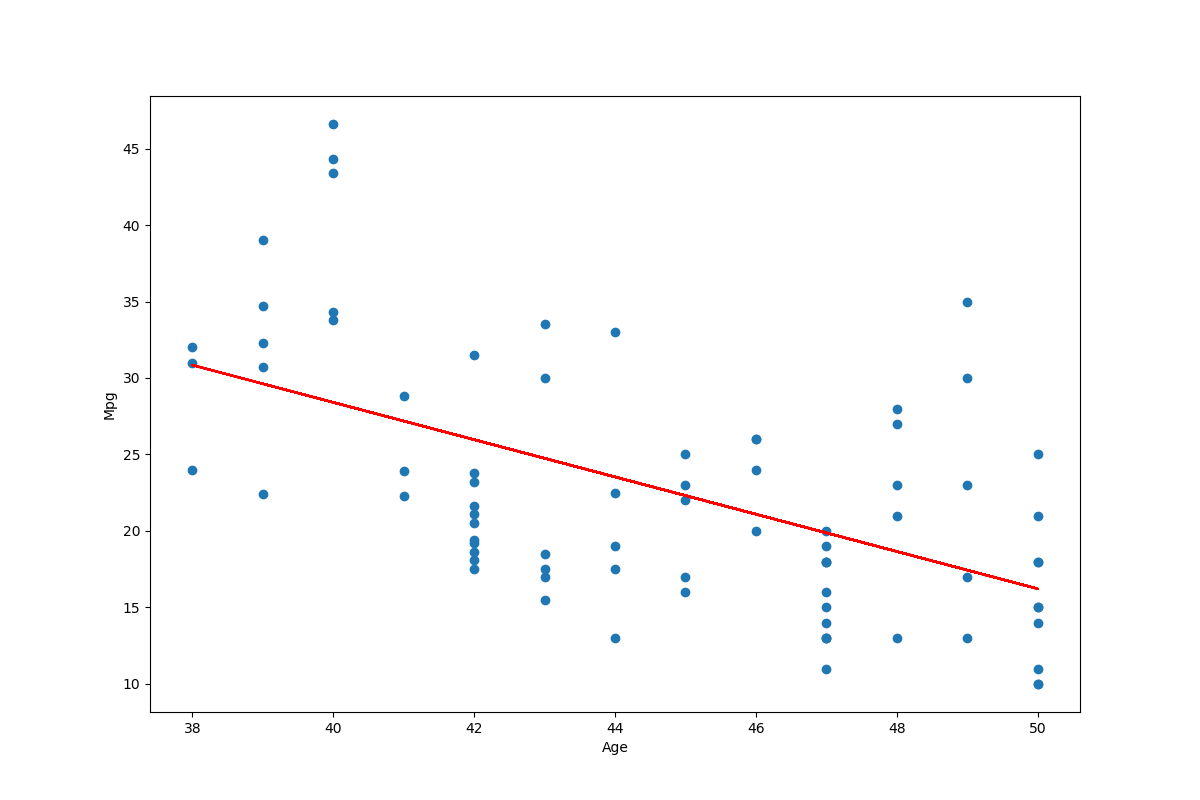

In [51]:
## remake a prediction model but with age v, 
## seperate training and testing data
from sklearn.model_selection import train_test_split
X = automobile_df[['age']]
Y = automobile_df['mpg']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=.2)
## train the model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True).fit(x_train,y_train)
print('Training Score: ',linear_model.score(x_train, y_train))
## Test the model
## The model is robust because it did far better on the test data than the training data so it is not
## overly fitted to the test data
from sklearn.metrics import r2_score
y_pred = linear_model.predict(x_test)
print('Testing Score: ',r2_score(y_test,y_pred))
## graph the model to see what's going on
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')
plt.xlabel('Age')
plt.ylabel('Mpg')
plt.show()

In [92]:
## Multi input regression
X = automobile_df[['displacement','horsepower','weight']]
#X = automobile_df[['displacement','horsepower','weight', 'acceleration','cylinders']] ## Including extra features will produce a lower prediction score

Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [93]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [94]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.7105705992018903


In [95]:
## if you could see the formula of this line, it would be y = mx +b where x is made of the coefficients (weight) of the model parameters
## if negative, then as the values for these columns increase, the mpg decreases
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

horsepower     -0.046364
weight         -0.005338
displacement   -0.005085
dtype: float64


In [96]:
y_pred = linear_model.predict(x_test)
print('Testing Score: ', r2_score(y_test, y_pred))

Testing Score:  0.6830461858094601


<IPython.core.display.Javascript object>


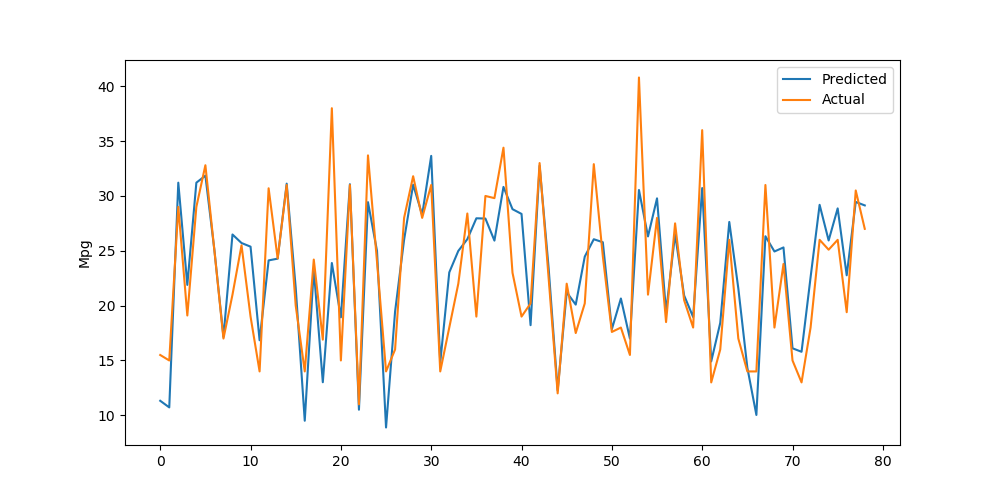

In [97]:
plt.figure(figsize = (10,5))
plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label = 'Actual')
plt.ylabel('Mpg')
plt.legend()
plt.show()